# Import

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")

# Preprocess and Merge Data

In [4]:
def preprocess(df, is_train=True):
    df = pd.merge(df, features, on=["Store", "Date", "IsHoliday"], how="left")
    df = pd.merge(df, stores, on="Store", how="left")
    df["Date"] = pd.to_datetime(df["Date"])
    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Week"] = df["Date"].dt.isocalendar().week.astype(int)
    df["Type"] = df["Type"].astype("category").cat.codes
    df["IsHoliday"] = df["IsHoliday"].astype(int)
    df.fillna(0, inplace=True)
    return df

train = preprocess(train)
test = preprocess(test, is_train=False)

# Select Features and Target


In [5]:
features_cols = [
    "Store", "Dept", "IsHoliday", "Temperature", "Fuel_Price",
    "CPI", "Unemployment", "Size", "Type", "Year", "Month", "Week",
    "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"
]

X_train = train[features_cols]
y_train = train["Weekly_Sales"]

X_test = test[features_cols]

# Train Linear Regression Model


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Prepare Submission


In [7]:
test["Weekly_Sales"] = predictions
submission = test[["Store", "Dept", "Date", "Weekly_Sales"]]
submission.to_csv("linear_regression_predictions.csv", index=False)

submission.head()

,Store,Dept,Date,Weekly_Sales
0,1,1,2012-11-02,12944.230823
1,1,1,2012-11-09,13327.021213
2,1,1,2012-11-16,12954.252086
3,1,1,2012-11-23,20681.985779
4,1,1,2012-11-30,13011.146087


# Plot sample store predictions


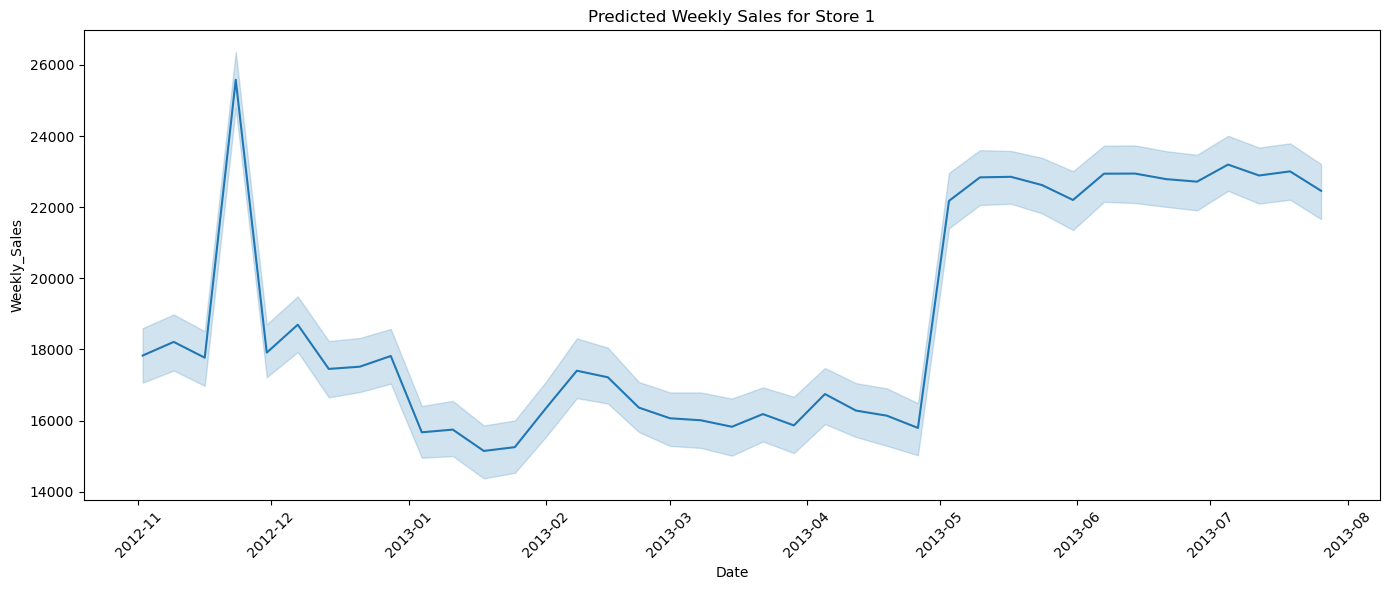

In [11]:
sample = submission[submission["Store"] == 1]
plt.figure(figsize=(14,6))
sns.lineplot(x="Date", y="Weekly_Sales", data=sample)
plt.title("Predicted Weekly Sales for Store 1")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()